# Second order PI

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from control.matlab import *

sym.init_printing()

In [2]:
z, Wn, Kg, Kp, tau, Ti = sym.symbols('zeta omega_n K_G K_p tau T_i')

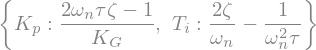

In [3]:
eq1 = sym.Eq(2*z*Wn, (1+Kg*Kp)/tau);
eq2 = sym.Eq(Wn**2 , (Kg*Kp)/(tau*Ti));
sym.solve((eq1, eq2),(Kp,Ti))

## Example

In [4]:
import control as ct
import numpy as np

Process:

        2.987e+04
-------------------------
s^2 + 414.7 s + 3.361e+04

Step response:


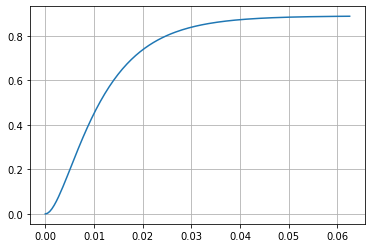

Step info:


{'RiseTime': 0.0217480341475997,
 'SettlingTime': 0.039871395937266116,
 'SettlingMin': 0.8000456798025747,
 'SettlingMax': 0.8873280912347106,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.8873280912347106,
 'PeakTime': 0.06252559817434913,
 'SteadyStateValue': 0.8887235941684023}

In [5]:
# System
num = [29870]
den = [1, 414.7, 33610]
G = ct.tf(num,den)
print('Process:')
print(G)

t, out = ct.step_response(G) 
print('Step response:')
plt.plot(t, out)
plt.grid()
plt.show()

print('Step info:')
stepinfo(G)

In [6]:
# Damping and natural frequency
ct.damp(G);

_____Eigenvalue______ Damping___ Frequency_
    -304.2                     1      304.2
    -110.5                     1      110.5


Poles:  [-304.22116444 -110.47883556]


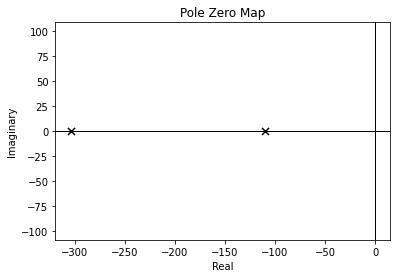

In [7]:
# Root locust
print('Poles: ',ct.pole(G))
ct.pzmap(G);

In [8]:
# Data
ts = 0.03
Mp = 25

b0 = num
a1 = den[1]
a0 = den[2]

In [9]:
# Requirements
z = np.sqrt(np.square(np.log(Mp/100))/(np.pi**2 + np.square(np.log(Mp/100)))) 
Wn = 4/(z*ts)

print('z= ', z)
print('Wn= ', Wn)

z=  0.40371275194342066
Wn=  330.2678270415884


In [10]:
# Desired characteristic equation and poles
print('delta = s² + {a}s + {b:1.4f}'.format(a=2*z*Wn,b=Wn**2))
print('s = {a} + j{b:1.4}'.format(a=-z*Wn, b=Wn*np.sqrt(1-z**2)))

delta = s² + 266.6666666666667s + 109076.8376
s = -133.33333333333334 + j302.2


In [13]:
# PI controller
B = a1/(z*Wn) - 2
Kp = ((2*B*z**2 + 1)*Wn**2 - a0)/b0
Ti = (Kp*b0)/(B*z*Wn**3)
print('Kp: {a}, Ti: {b}'.format(a = Kp, b = Ti))

Kp = float(Kp)
Ti = float(Ti)

Gc = ct.tf([Kp*Ti, Kp],[Ti, 0])
print('Feedback PI- controlled system:')
print(Gc)

Kp: [3.84808815], Ti: [0.00711849]
Feedback PI- controlled system:

0.02739 s + 3.848
-----------------
   0.007118 s



In [ ]:
# PI response
sys = ct.feedback(Gc*G)
t, out = ct.step_response(sys)
print('Step response:')
plt.plot(t,out)
plt.grid()
plt.show()

print('Step info:')
stepinfo(sys)

In [ ]:
ct.pzmap(sys);
print('Poles: ',ct.pole(sys))